In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../code/')
sys.path.append('/Users/ssulheim/git/mwf_gems/code/python')
import leakage_reframed
import ng_utils
import leakage
import reframed
import scipy

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_80903/1082340509.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# C glutamicum

In [2]:
exometabolites_folder = Path("../../data/c_glutamicum/")
organism = 'c_glutamicum'
fn_OD = exometabolites_folder / "{0}_OD.csv".format(organism)

In [3]:
gDW_per_OD = 0.32

In [4]:
concentrations, concentrations_std = leakage.get_concentrations(exometabolites_folder, 'c_glutamicum')

In [5]:
df_OD = pd.read_csv(fn_OD, index_col=0)
df_OD.fillna(df_OD['OD std'].mean())

,OD mean,OD std
Time,,
0,0.291000,3.657989
11,2.460000,0.040000
12,3.366667,0.070946
13,4.123333,0.075719
14,5.316667,0.049329
15,8.813333,0.147422
16,14.000000,0.200000
17,15.866667,0.208167
18,19.533333,0.503322


(0.0, 30.0)

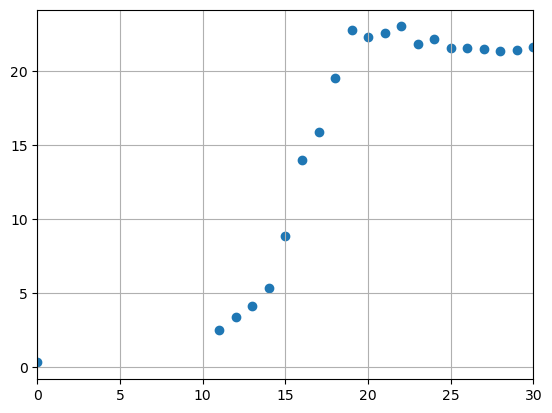

In [65]:
plt.scatter(df_OD.index, df_OD['OD mean'])
plt.grid()
plt.xlim(0,30)

In [81]:
fit = np.polyfit(df_OD.index[0:3], np.log(df_OD['OD mean'][0:3]), 1)

In [85]:
xarr = np.arange(0, 20, 0.1)
y0 = df_OD['OD mean'][0]
y = y0*np.exp(xarr*fit[0])

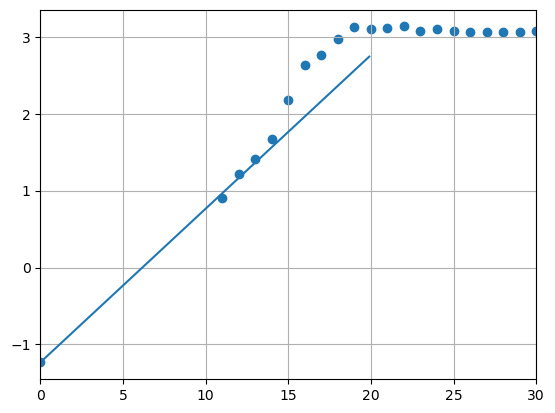

In [86]:
plt.scatter(df_OD.index, np.log(df_OD['OD mean']))
plt.grid()
plt.xlim(0,30)
plt.plot(xarr, np.log(y))

In [141]:
fit_exp = np.polyfit(df_OD.index[1:10], np.log(df_OD['OD mean'][1:10]), 1)
fit_exp

array([ 0.29730784, -2.3620002 ])

## Calculate integrated OD from 0 to 11 analytically from growth rate

In [87]:
int_0_to_11 = (y0/fit[0])*(np.exp(11*fit[0])-1)

In [88]:
int_0_to_11

11.668163886929982

In [100]:
df_OD['OD mean'].values[1:3]

array([2.46      , 3.36666667])

In [97]:
scipy.integrate.simpson(df_OD['OD mean'].values[1:3], x = df_OD.index[1:3])

2.9133333335

In [123]:
xt = np.zeros(len(df_OD)-1)
for i in range(1, len(df_OD)-1):
    xt[i] = scipy.integrate.simpson(df_OD['OD mean'].values[1:i+1], x = df_OD.index[1:i+1])
    # xt[i] = np.trapz(df_OD.loc[:i, 'OD mean'], dx=1)
    print(i,df_OD.index[i], df_OD['OD mean'].iloc[i], xt[i]*gDW_per_OD)#
xt[1:] += int_0_to_11 # I do this because the simpson integration from 0 to 11 is overestimating the biomass
x = xt*gDW_per_OD

1 11 2.46 0.0
2 12 3.366666667 0.9322666667199999
3 13 4.123333333 2.1386666667733336
4 14 5.316666667 3.6374222222933335
5 15 8.813333333 5.787022222399998
6 16 14.0 9.392088888986667
7 17 15.86666667 14.392888889386667
8 18 19.53333333 20.00888888965333
9 19 22.76666667 26.847999999786662
10 20 22.26666667 34.15288888992
11 21 22.56666667 41.18400000192
12 22 23.0 48.471111113653336
13 23 21.8 55.729777780053325
14 24 22.13333333 62.71822222405333
15 25 21.56666667 69.79911111231999
16 26 21.53333333 76.68088889045333
17 27 21.5 83.58044444458666
18 28 21.36666667 90.44177777845333
19 29 21.43333333 97.27644444565333
20 30 21.6 104.15911111152
21 31 21.1 111.02933333418667
22 32 21.6 117.83466666752
23 34 20.33333333 131.46133333338668
24 36 19.7 144.23822222085334
25 38 19.33333333 156.73422222085333
26 40 19.56666667 169.15022222032
27 42 19.5 181.71555555632
28 44 20.3 194.40533333392
29 46 20.46666667 207.56444444591997
30 48 20.43333333 220.66311111312
31 50 20.03333333 233.6408

# Estimate max glucose uptake rate
Answer = -2.56 mmol/gDW/h

In [125]:
fn_glucose = exometabolites_folder / "{0}_glucose.csv".format(organism)

df_glucose = pd.read_csv(fn_glucose, index_col=0)
# df_glucose.loc[0,:]=[20,0] # From paper (in g/L)

In [126]:
# cum_OD = np.zeros(53)*np.nan
OD_values = df_OD['OD mean'].values
timepoints = df_OD.index
# for i in range(9):
#     cum_OD[i] = scipy.integrate.trapezoid(y = OD_values[:i+1], x = timepoints[:i+1])

In [127]:
mu = (np.log(OD_values)[9]-np.log(OD_values)[1])/(timepoints[9]-timepoints[1])

In [128]:
growth_fun = lambda t: OD_values[1]*np.exp(mu*(t-11))

In [129]:
timepoints

Index([  0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  36,  38,  40,  42,
        44,  46,  48,  50,  52,  56,  60,  64,  68,  72,  76,  80,  86,  92,
        98, 104, 110, 116, 128, 140, 152, 164, 182, 227, 229],
      dtype='int64', name='Time')

In [130]:
# df_OD['Cum OD'] = cum_OD
# df_OD['Cum OD gDW'] = df_OD['Cum OD']*gDW_per_OD
df_glucose['Glucose mM'] = df_glucose['Glucose mean']/180.18*1000

(0.0, 150.0)

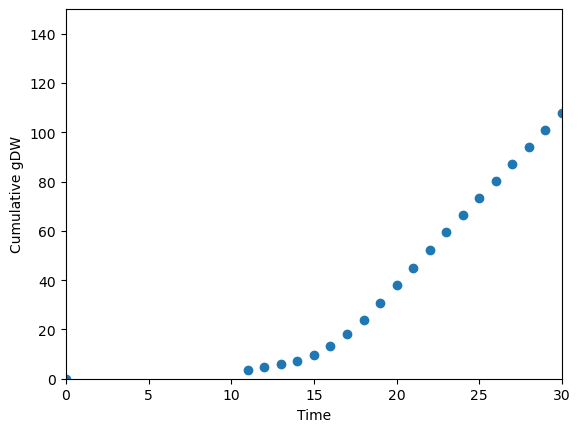

In [131]:
plt.scatter(df_OD.index[:-1], x)
plt.xlabel('Time')
plt.ylabel('Cumulative gDW')
plt.xlim(0, 30)
plt.ylim(0,150)

(0.0, 150.0)

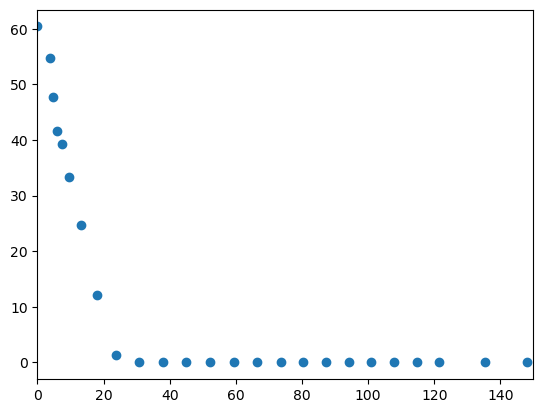

In [132]:
plt.scatter(x, df_glucose['Glucose mM'].values[:-1])
plt.xlim(0, 150)

In [136]:
np.polyfit(x[:9], df_glucose['Glucose mM'][:9], 1)

array([-2.56003829, 59.5402788 ])

## Mapping

In [142]:
mapping_df = pd.read_csv('../../data/id_mapping.csv', index_col=0)
# mapping_df.index = [x.strip('\t').replace(" MS", "") for x in mapping_df.index]
met_abrv_to_id = mapping_df['Cglutamicum metabolite'].to_dict()
met_abrv_to_name = mapping_df['Metabolite name'].to_dict()


# Estimate rates

In [143]:
specific_limits = {
'G6P': (1,18),
'F6P': (1,18),
'FBP': (1,18),
'DHAP': (1,18),
'GA3P': (1,18),
'23PG': (1,18),
'R5P': (1,18),
'RU5P+X5P': (1,18),
'S7P': (1,18),
'E4P': (1,18),
'ASN': (1,18),
'GLU': (1,17),
'SER': (1,17),
'THR': (1,17),
'GLN': (1,17),
'HOM': (1,17),
'TYR': (1,17),
'GLY': (1,18),
'PRO': (1,17),
'ALA': (1,17),
'MET': (1,17),
'VAL': (1,17),
'ARG': (1,17),
'LYS': (1,18)}

R-squared: 0.952570
R-squared: 0.949470
R-squared: 0.794677
R-squared: 0.968389
R-squared: 0.992945
R-squared: 0.995048
R-squared: 0.969958
R-squared: 0.951805
R-squared: 0.973944
R-squared: 0.956978
R-squared: 0.971138
R-squared: 0.947042
SER One or zero non-zero values in expo. phase
THR More than 1 zero
R-squared: 0.694247
R-squared: 0.860902
R-squared: 0.997824
TYR One or zero non-zero values in expo. phase
R-squared: 0.936168
R-squared: 0.946583
R-squared: 0.974605
MET One or zero non-zero values in expo. phase
VAL One or zero non-zero values in expo. phase
ARG One or zero non-zero values in expo. phase
R-squared: 0.997399


/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_80903/738746257.py:69: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, y_max)


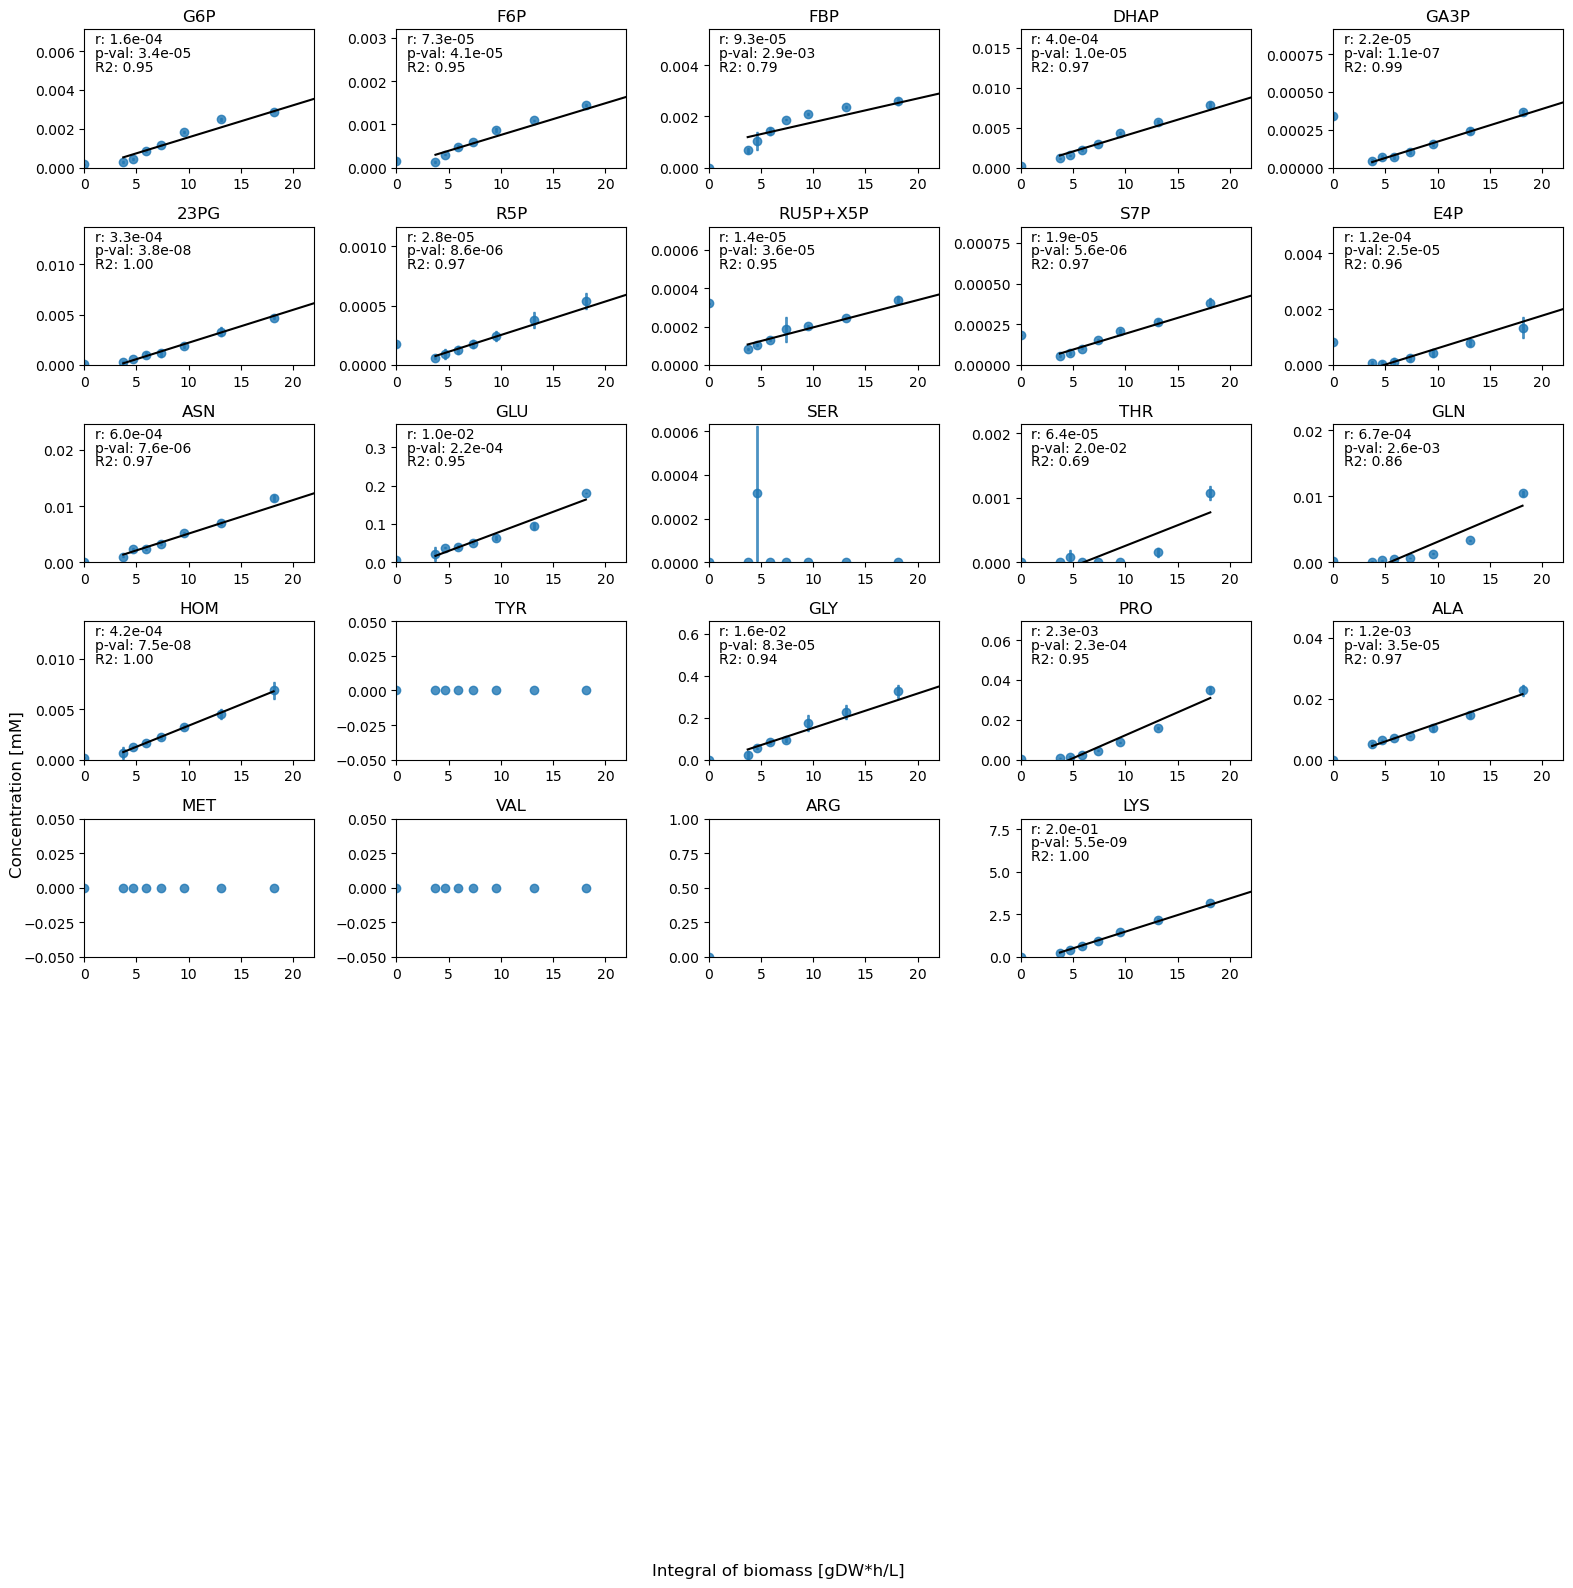

In [144]:
rate_dict_m = {}
fig, axes = plt.subplots(8,5, figsize = (16, 16), sharex = False)
axes = axes.flatten()
fun = lambda x, a ,b: x*a+b
data_list = []
for i,c in enumerate(concentrations.columns):
    # print(c)
    plot_fit = True
    conc = concentrations[c][:-1]*1e-3 # Convert from uM to mM #
    conc_std = concentrations_std[c][:-1]*1e-3
    lim = specific_limits[c]
    idx = ((concentrations.index >= lim[0]) & (concentrations.index <= lim[1]))[:-1]
    nan_idx = ~np.isnan(conc)

    idx = idx & nan_idx
    rate_conc = conc[idx]
    if np.sum(rate_conc == 0) > 1:
        if (np.sum(rate_conc == 0) >= len(rate_conc)-1):
            print(c, 'One or zero non-zero values in expo. phase')
            plot_fit = False
        else:
            print(c, 'More than 1 zero')
    elif (np.sum(idx.values)<=1):
        print(c, 'One or zero non-zero values in expo. phase')
        plot_fit = False
        
    # conc[conc==0] = np.nan
    # fit, cov, _,_,_ = scipy.optimize.curve_fit(fun, x[idx],
    #                                            conc[idx], full_output=True)

    # rate = fit[0]
    # std_err = np.sqrt(np.diag(cov))[0]
    # t_score = fit[0]/std_err
    # n_df = np.sum(idx)-2
 
    # p_val = scipy.stats.t.sf(t_score, df = n_df)*2 # *2 is to get two-sided
    if plot_fit:
        res = scipy.stats.linregress(x[idx], conc[idx])
        print(f"R-squared: {res.rvalue**2:.6f}")
        r2 = res.rvalue**2
        data = [res.slope, res.stderr,res.pvalue, c, res.pvalue < 0.05, r2]
        data_list.append(data)
        x_fit = np.linspace(x[idx].min(), x[idx].max(), 3)
        y_fit = fun(x_fit, res.slope, res.intercept)
    # rate_dict_m[c] = fit[0]
    # print(fit)
    
    ax = axes[i]
    ax.errorbar(x, conc, yerr = conc_std, fmt='o',color='C0',capthick=1,elinewidth=2,capsize=1, zorder = 0, alpha= 0.8)

    # ax.scatter(x, conc)
    # ax.scatter(x, conc)
    if len(conc[idx]):
        y_max =  np.nanmax(conc[idx])*2#[idx])
    else:
        y_max = 1
    if plot_fit:
        if r2 > 0.5:
            ax.plot(x_fit, y_fit, 'k')
        else:
            ax.plot(x_fit, y_fit, 'r')
            
        ax.annotate(f'r: {res.slope:.1e}', (1, y_max*0.9))
        ax.annotate(f'p-val: {res.pvalue:.1e}', (1, y_max*0.8))
        ax.annotate(f'R2: {r2:.2f}', (1, y_max*0.7))
        
    ax.set_title(c)
    ax.set_xlim(0, 22)
    ax.set_ylim(0, y_max)

    i +=1
    # print(i)

while i<(8*5):
    axes[i].set_visible(False)
    i+=1

fig.supxlabel('Integral of biomass [gDW*h/L]')
fig.supylabel('Concentration [mM]')

plt.tight_layout()
plt.savefig('cglutamicum_fitted_rates_manual_limits.png', dpi = 400)
plt.show()

In [145]:
rate_data = pd.DataFrame(data_list, columns = ['Rate [mmol/gDW/h]', 'Std.Err [mmol/gDW/h]', 'p-val', 'Metabolite abbrv.', 'Significance', 'R2'])

In [146]:
# rate_dict = {}
# fig, axes = plt.subplots(7,5, figsize = (8, 12), sharex = True)
# axes = axes.flatten()
# fun = lambda x, a ,b: x*a+b
# for i,c in enumerate(concentrations.columns):
#     conc = concentrations[c]
#     conc[conc==0] = np.nan
#     nan_idx = ~np.isnan(conc)
#     time_idx = x.index < 19
#     if np.sum(nan_idx&time_idx) == 1:
#         conc[0] = 0
#         nan_idx[0] = True
        
#     # print(conc[nan_idx&time_idx])
#     rate_conc = conc[nan_idx&time_idx]
#     selection = np.ones(len(conc)).astype(bool)
#     # if (7 in rate_conc.index) and (8 in rate_conc.index):
#     #     if rate_conc[8] < rate_conc[7]:
#     #         selection[8] = False
#     #         if rate_conc[6] < rate_conc[7]:
#     #             selection[7] = False
#     # print(c)
#     # print(conc[nan_idx&time_idx])
#     if len(conc[nan_idx&time_idx&selection]) >1:
#         fit, cov, _,_,_ = scipy.optimize.curve_fit(fun, x[nan_idx&time_idx&selection],
#                                                    conc[nan_idx&time_idx&selection],
#                                                    full_output=True)
#         rate_dict[c] = fit[0]
#     else:
#         rate_dict[c] = np.nan

#     # print(fit)
#     x_fit = np.linspace(0, x[nan_idx&time_idx].max(), 3)
#     y_fit = fun(x_fit, *fit)
#     ax = axes[i]
#     # ax.scatter(x, conc)
#     ax.scatter(x[nan_idx&time_idx], conc[nan_idx&time_idx])
#     ax.plot(x_fit, y_fit, 'r')
#     ax.set_title(c, )

# i +=1
# # print(i)
# while i<(7*5):
#     axes[i].set_visible(False)
#     i+=1

# fig.supxlabel('Integral of biomass [gDW*h/L]')
# fig.supylabel('Concentration [mM]')

# plt.tight_layout()
# plt.show()


# Get model

In [158]:
model_ez = reframed.load_cbmodel('../../models/c_glutamicum/smoment_iCW773.xml')
model_ez.solver = 'gurobi'
glucose_uptake = -2.56

In [159]:
solution = reframed.FBA(model_ez, constraints={'R_EX_glc_e': (glucose_uptake,0)})
solution.show_values('EX')

R_EX_ca2_e   -0.00803926
R_EX_co2_e    5.50096
R_EX_cobalt2_e -3.88619e-05
R_EX_cu2_e   -0.00109466
R_EX_fe2_e   -0.0224293
R_EX_glc_e   -2.56
R_EX_h_e      1.83652
R_EX_h2o_e    10.7118
R_EX_k_e     -0.30147
R_EX_mg2_e   -0.0133986
R_EX_mn2_e   -0.00106787
R_EX_nh4_e   -2.06003
R_EX_ni2_e   -0.000498437
R_EX_o2_e    -4.8132
R_EX_pi_e    -0.118266
R_EX_so4_e   -0.038162
R_EX_xan_e    0.0381955
R_EX_zn2_e   -0.000526561
R_EX_biomass  0.238014
R_EX_BIOTIN  -5.65586e-07
R_EX_cl      -0.00803926


In [160]:
measured_metabolites = []
for bigg_id in met_abrv_to_id.values():
    if not isinstance(bigg_id, str):
        continue
    m_ids = bigg_id.split(', ')
    for m_id in m_ids:
        if f'M_{m_id}_c' in model_ez.metabolites:
            measured_metabolites.append(f'M_{m_id}_c')

# Shadow prices

In [161]:
shadow_prices = leakage_reframed.estimate_shadow_prices(model_ez, constraints={'R_EX_glc_e': (glucose_uptake,0)}, metabolites = measured_metabolites)

In [177]:
glc_uptake_range = np.linspace(glucose_uptake*1.2, glucose_uptake*0.8, 5, endpoint=True)
shadow_price_list = []
for g in glc_uptake_range:
    shadow_prices_i = leakage_reframed.estimate_shadow_prices(model_ez, constraints={'R_EX_glc_e': (g,0)}, metabolites = measured_metabolites)
    shadow_price_list.append(shadow_prices_i)
shadow_price_list.append(shadow_prices)

In [178]:
df_sp_var = pd.DataFrame(shadow_price_list)

# Turnover

In [179]:
solution = reframed.pFBA(model_ez, constraints={'R_EX_glc_e': (glucose_uptake,0)})
turnover = solution.get_metabolites_turnover(model_ez)

    

# Make spreadsheet

In [180]:
data = []
drop_mets = ['ru5p__L','xu5p__L'] # The L-forms is used in the pentose phosphate pathway, so we assume that it is primarily the D-forms
# 'Std.Err [mmol/gDW/h]', 'T-score', 'degrees of freedom', 'p-val', 'Metabolite abbrv.', 'Significance']
for _, row in rate_data.iterrows():
    if row['R2']<0.5:
        continue
    abbr = row['Metabolite abbrv.']
    rate = row['Rate [mmol/gDW/h]']
    bigg_ids = [x.strip() for x in met_abrv_to_id[abbr].split(',') if not x.strip() in drop_mets]
    if len(bigg_ids)>1:
        print(bigg_ids)
    rate_i = rate/len(bigg_ids)
    std_err_i = row['Std.Err [mmol/gDW/h]']/np.sqrt(len(bigg_ids))
    for bigg_id in bigg_ids:
        name =met_abrv_to_name[abbr]
        m_id = f'M_{bigg_id}_c'
        mv = -shadow_prices[m_id]
        m = model_ez.metabolites[m_id]
        element_dict = ng_utils.get_element_dict(m)
        Nc = element_dict['C']
        mass = ng_utils.get_mol_weight(m)
        mv_min = -df_sp_var.max()[m_id]
        mv_max = -df_sp_var.min()[m_id]
        
        data.append([abbr, bigg_id, name, mv, mv_min, mv_max, turnover[m_id], Nc, mass, rate_i, std_err_i, row['R2']])
df_rate = pd.DataFrame(data, columns = ['Metabolite abbrv.', 'BiGG ID', 'Metabolite', 
                                        'Metabolite value [gDW/mmol]','MV min', 'MV max', 
                                        'Turnover [mmol/gDW/h]', 'N carbons', 
                                        'Mol weight [g/mol]', 'Rate [mmol/gDW/h]', 'Std.Err [mmol/gDW/h]', 'R2'])

['2pg', '3pg']
['ru5p__D', 'xu5p__D']


In [181]:
# data = []
# for abbr, rate in rate_dict.items():
#     bigg_ids = [x.strip() for x in met_abrv_to_id[abbr].split(',')]
#     rate = rate/len(bigg_ids)
#     for bigg_id in bigg_ids:
#         name =met_abrv_to_name[abbr]
#         m_id = f'M_{bigg_id}_c'
#         mv = -shadow_prices[m_id]
#         m = model_ez.metabolites[m_id]
#         element_dict = ng_utils.get_element_dict(m)
#         Nc = element_dict['C']
#         mass = ng_utils.get_mol_weight(m)
        
#         data.append([bigg_id, name, rate, mv, turnover[m_id], Nc, mass])
# df_rate = pd.DataFrame(data, columns = ['BiGG ID', 'Metabolite', 'Rate [mmol/gDW/h]', 
#                                         'Metabolite value [gDW/mmol]', 'Turnover [mmol/gDW/h]', 'N carbons', 
#                                         'Mol weight [g/mol]'])

In [182]:
df_rate['Species'] = 'C. glutamicum'
df_rate['Carbon source'] = 'Glucose'
df_rate['Dataset'] = 'Paczia-13'

In [183]:
df_rate.to_csv('paczia_13_rates_cglutamicum_0824.csv')